# **Imports**

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functionsML as f
from itertools import combinations
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler

# data partition
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import importlib
importlib.reload(f)

from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### **Import data sets**

In [34]:
train_db = pd.read_csv("./train.csv")
test_db = pd.read_csv("./test.csv")

# **Data exploration**

Our goal here is to understand the data, and the issues that come with it

In [52]:
train_db.head(15)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.000000,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.000000,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.000000,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.000000,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.000000,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
5,14704,BMW,3 Series,2014.0,8199,anual,101153.348285,Diesel,30.0,65.700000,2.0,74.0,0.000000,0.0
6,6924,Audi,A3,2017.0,16089,Manual,21396.000000,Petrol,20.0,60.100000,1.4,75.0,4.000000,0.0
7,50783,Skoda,Octavia,2017.0,7500,Manual,116750.000000,Diesel,145.0,68.900000,1.6,59.0,4.000000,0.0
8,67071,VW,Passat,2017.0,15999,Semi-Auto,30339.000000,Diesel,150.0,62.800000,2.0,85.0,4.000000,0.0
9,23348,Ford,Focus,2019.0,15300,Manual,10700.000000,Petrol,150.0,60.100000,1.0,35.0,1.000000,0.0


- Typos in transmission and fuel

- EngineSize with NaN

- Mileage, mpg and previousOwners with irational values

- PreviousOwners with negative values

- hasDamage seems to always be 0

In [53]:
train_db.describe(include='object')

,Brand,model,transmission,fuelType
count,74452,74456,74451,74462
unique,72,735,40,34
top,Ford,Focus,Manual,Petrol
freq,14808,6353,38050,37995


- The categorical variables have a lot of unique values

In [54]:
train_db.describe()

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,37986.000000,2017.096611,16881.889553,23004.184088,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,21931.660338,2.208704,9736.926322,22129.788366,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,0.000000,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,18993.000000,2016.000000,10200.000000,7423.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,2017.000000,14699.000000,17300.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,2019.000000,20950.000000,32427.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,75972.000000,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


- Missing values in year mileage tax mpg engineSize paintQuality% previousOwners and hasDamage

- Alarming min values in mileage tax mpg engineSize paintQuality% previousOwners

- Alarming max values in year mpg paintQuality% previousOwners

- HasDamage is always 0

In [23]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


- Year is float64, should be int64

- PreviousOwners is float, should be int64

In [24]:
f.missing_values_table(train_db)

Total columns: 14
Columns with missing values: 12



,Missing Values,Percent Missing (%)
mpg,7926,10.43
tax,7904,10.40
hasDamage,1548,2.04
previousOwners,1550,2.04
paintQuality%,1524,2.01
transmission,1522,2.00
model,1517,2.00
Brand,1521,2.00
engineSize,1516,2.00
fuelType,1511,1.99


In [25]:
f.negative_values_table(train_db)
# In this context negative numbers don't make sense

Total numeric columns: 10
Columns with negative values: 5



,Negative Values,Percent Negative (%)
tax,378,0.50
mileage,369,0.49
previousOwners,371,0.49
engineSize,84,0.11
mpg,36,0.05


In [26]:
f.irrational_values_table(train_db)
# Realistically none of the numerical variables should have entries with more than 1-2 decimals

Total numeric columns: 10
Columns with irrational values: 7
Rows with at least one irrational value: 5060



,Irrational Count,Percent Irrational (%)
tax,759,1.00
engineSize,762,1.00
mileage,755,0.99
previousOwners,734,0.97
mpg,738,0.97
paintQuality%,726,0.96
year,723,0.95
Total (rows with any irrational value),5060,6.66


# **Unique Values**

We wanted to take a better look at what kind of values each variable had, and we ended up finding:

- Typos in every categorical variable

- Different letter casing in every categorical variable

- Unrealistic negative values and irrational values in every numerical category

In [27]:
# Loop through each column in the DataFrame
for column in train_db.columns:

    # Print unique values and count for columns with fewer than 20 unique values
    print(f"Unique values in '{column}': {train_db[column].unique()}")
    print(f"Number of unique values: {train_db[column].nunique()}\n")


Unique values in 'carID': [69512 53000  6366 ... 54886   860 15795]
Number of unique values: 75973

Unique values in 'Brand': ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
Number of unique values: 72

Unique values in 'model': [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'

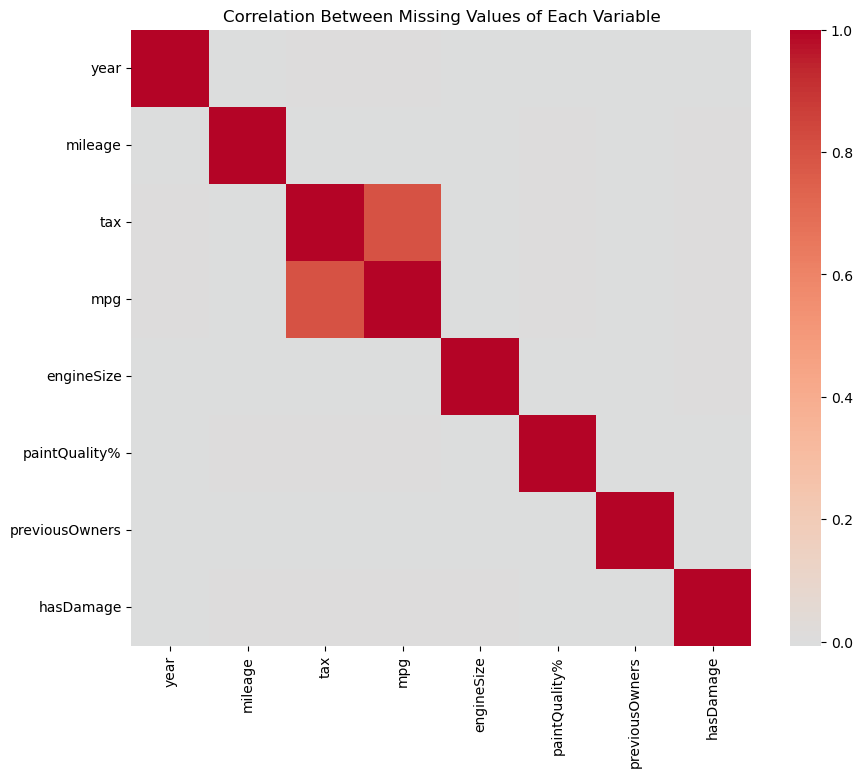

In [28]:

missing_mask = train_db.drop(columns=["carID", "price"], errors="ignore").select_dtypes(include=["number"]).isna()

missing_corr = missing_mask.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(missing_corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Between Missing Values of Each Variable")
plt.show()

- There is a strong correlation between mpg's and tax's missing values

# **Distributions & Value Counts**

In [29]:
train_db["Brand"].value_counts()

Brand
Ford        14808
Mercedes    10754
VW           9780
Opel         8645
BMW          6968
            ...  
OYOTA           2
SKOD            1
TOYOT           1
skod            1
toyot           1
Name: count, Length: 72, dtype: int64

In [30]:
train_db["model"].value_counts()

model
 Focus        6353
 C Class      4886
 Fiesta       4130
 Golf         3081
 Corsa        2182
              ... 
M5               1
 gls class       1
Mokka            1
 6 Serie         1
 JETTA           1
Name: count, Length: 735, dtype: int64

- Some entries also have space characters

In [31]:
train_db["transmission"].value_counts()

transmission
Manual       38050
Semi-Auto    15545
Automatic    14003
anual          804
MANUAL         801
manual         770
Manua          759
unknown        690
 Manual        366
Semi-Aut       332
emi-Auto       325
semi-auto      324
utomatic       313
SEMI-AUTO      309
Automati       304
AUTOMATIC      289
automatic      282
unknow          18
Manual          16
UNKNOWN         14
ANUAL           13
nknown          13
anua            12
SEMI-AUT        11
MANUA           11
emi-auto        10
 MANUAL          9
EMI-AUTO         7
 Manual          7
automati         6
utomati          6
 manual          6
AUTOMATI         6
emi-Aut          5
Other            5
semi-aut         4
manua            2
UTOMATIC         2
manual           1
nknow            1
Name: count, dtype: int64

In [32]:
train_db["fuelType"].value_counts()

fuelType
Petrol      37995
Diesel      28474
Hybrid       2043
PETROL        795
etrol         794
Petro         785
petrol        746
iesel         603
diesel        599
Diese         582
DIESEL        582
Other         150
HYBRID         50
hybrid         46
Hybri          43
ybrid          37
petro          18
etro           17
ETROL          16
IESEL          16
PETRO          14
DIESE          10
iese           10
diese           8
Othe            6
ther            6
Electric        4
YBRID           3
OTHER           3
other           2
HYBRI           2
ybri            1
ETRO            1
IESE            1
Name: count, dtype: int64

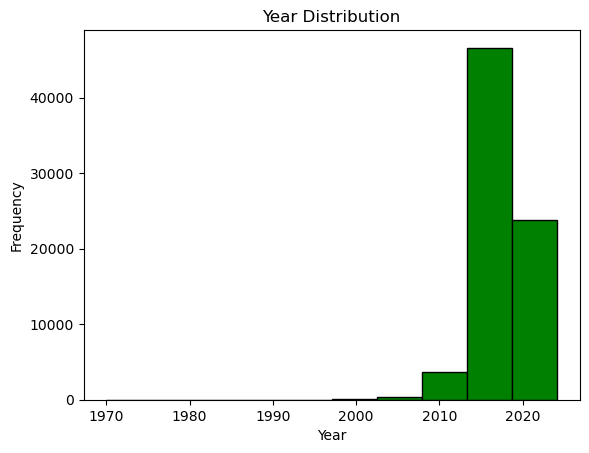

In [33]:
# Plot histogram for the "year" column
f.plot_histogram(train_db["year"], 
                 "Year",         # x-axis label
                 "Frequency",   # y-axis label
                 "Year Distribution")  # title of the plot

- The distribuition is very right side heavy, with only a few entries before the year 2000

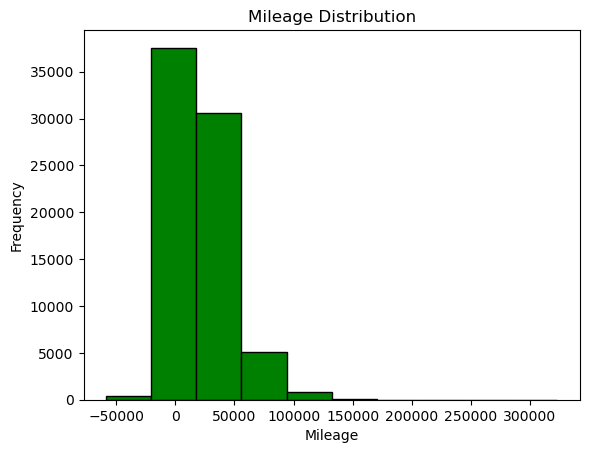

In [34]:
# Plot histogram for the "mileage" column
f.plot_histogram(train_db["mileage"], 
                 "Mileage",         # x-axis label
                 "Frequency",   # y-axis label
                 "Mileage Distribution")  # title of the plot

- There are some entries with negative mileage

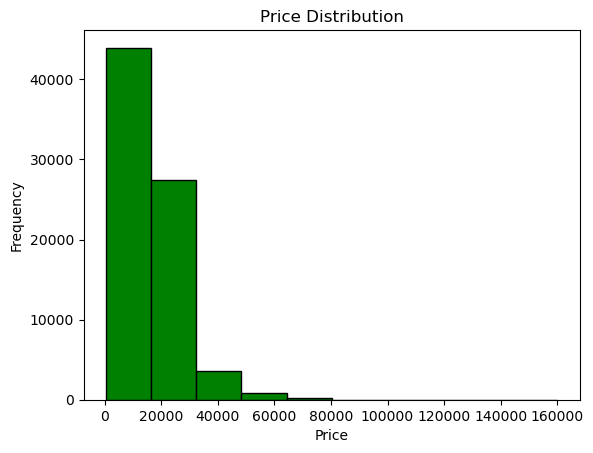

In [35]:
# Plot histogram for the "price" column
f.plot_histogram(train_db["price"], 
                 "Price",         # x-axis label
                 "Frequency",   # y-axis label
                 "Price Distribution")  # title of the plot

- The distribuition is very heavy on the lower end of prices

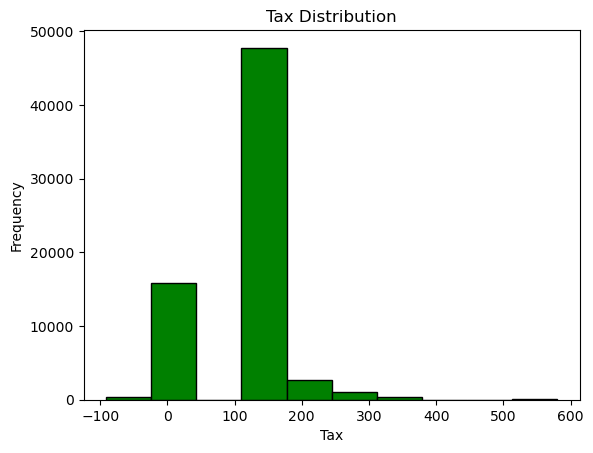

In [36]:
# Plot histogram for the "tax" column
f.plot_histogram(train_db["tax"], 
                 "Tax",         # x-axis label
                 "Frequency",   # y-axis label
                 "Tax Distribution")  # title of the ploty

- There are negative tax values and there is a gap between entries with 0 tax and 100

- The majirity of the entries are between 100 and 200 dollars

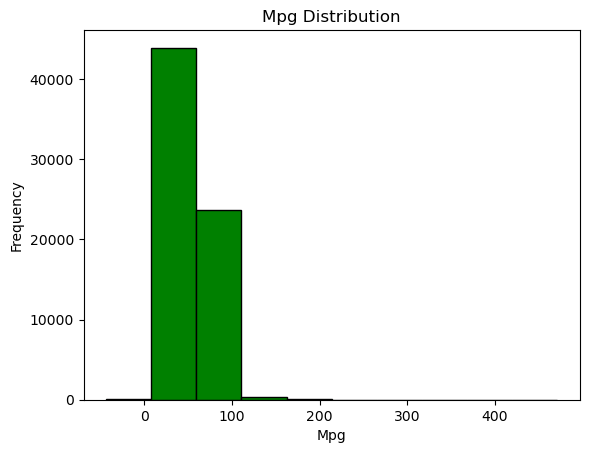

In [37]:
# Plot histogram for the "mpg" column
f.plot_histogram(train_db["mpg"], 
                 "Mpg",         # x-axis label
                 "Frequency",   # y-axis label
                 "Mpg Distribution")  # title of the ploty

- There are a few negative values and values over 100

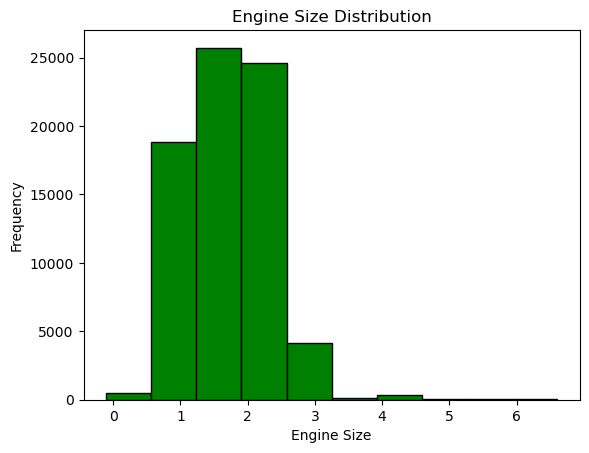

In [38]:
# Plot histogram for the "engineSize" column
f.plot_histogram(train_db["engineSize"], 
                 "Engine Size",         # x-axis label
                 "Frequency",   # y-axis label
                 "Engine Size Distribution")  # title of the ploty

- Engine sizes at 0, and a few above 3

# **Fixing issues**

#### Here we aim to treat the spotted issues, treat outliers and NaN values

In [35]:
# Drop irrelevant column that can only be obtained by the mechanic
train_db = train_db.drop(columns=["hasDamage","paintQuality%"])

train_db_numerical = train_db.select_dtypes(exclude=["object"]).columns
# Lowercase text columns
train_db_categorical = train_db.select_dtypes(include=["object"]).columns
train_db[train_db_categorical] = train_db[train_db_categorical].apply(lambda x: x.str.lower() if x.dtype=="object" else x)


# Loop and fix all categorical columns
for col in train_db_categorical:
    train_db = f.fix_typos(col, train_db)

# Rounding future Int values
train_db.loc[:, "year"] = train_db["year"].round()

# Rounds every other irrational number into having one precision digit
for col in train_db.select_dtypes(include="float64").columns:
    # Round each column to 1 digit after the decimal
    train_db[col] = train_db[col].round(1)

### **Outlier treatment**

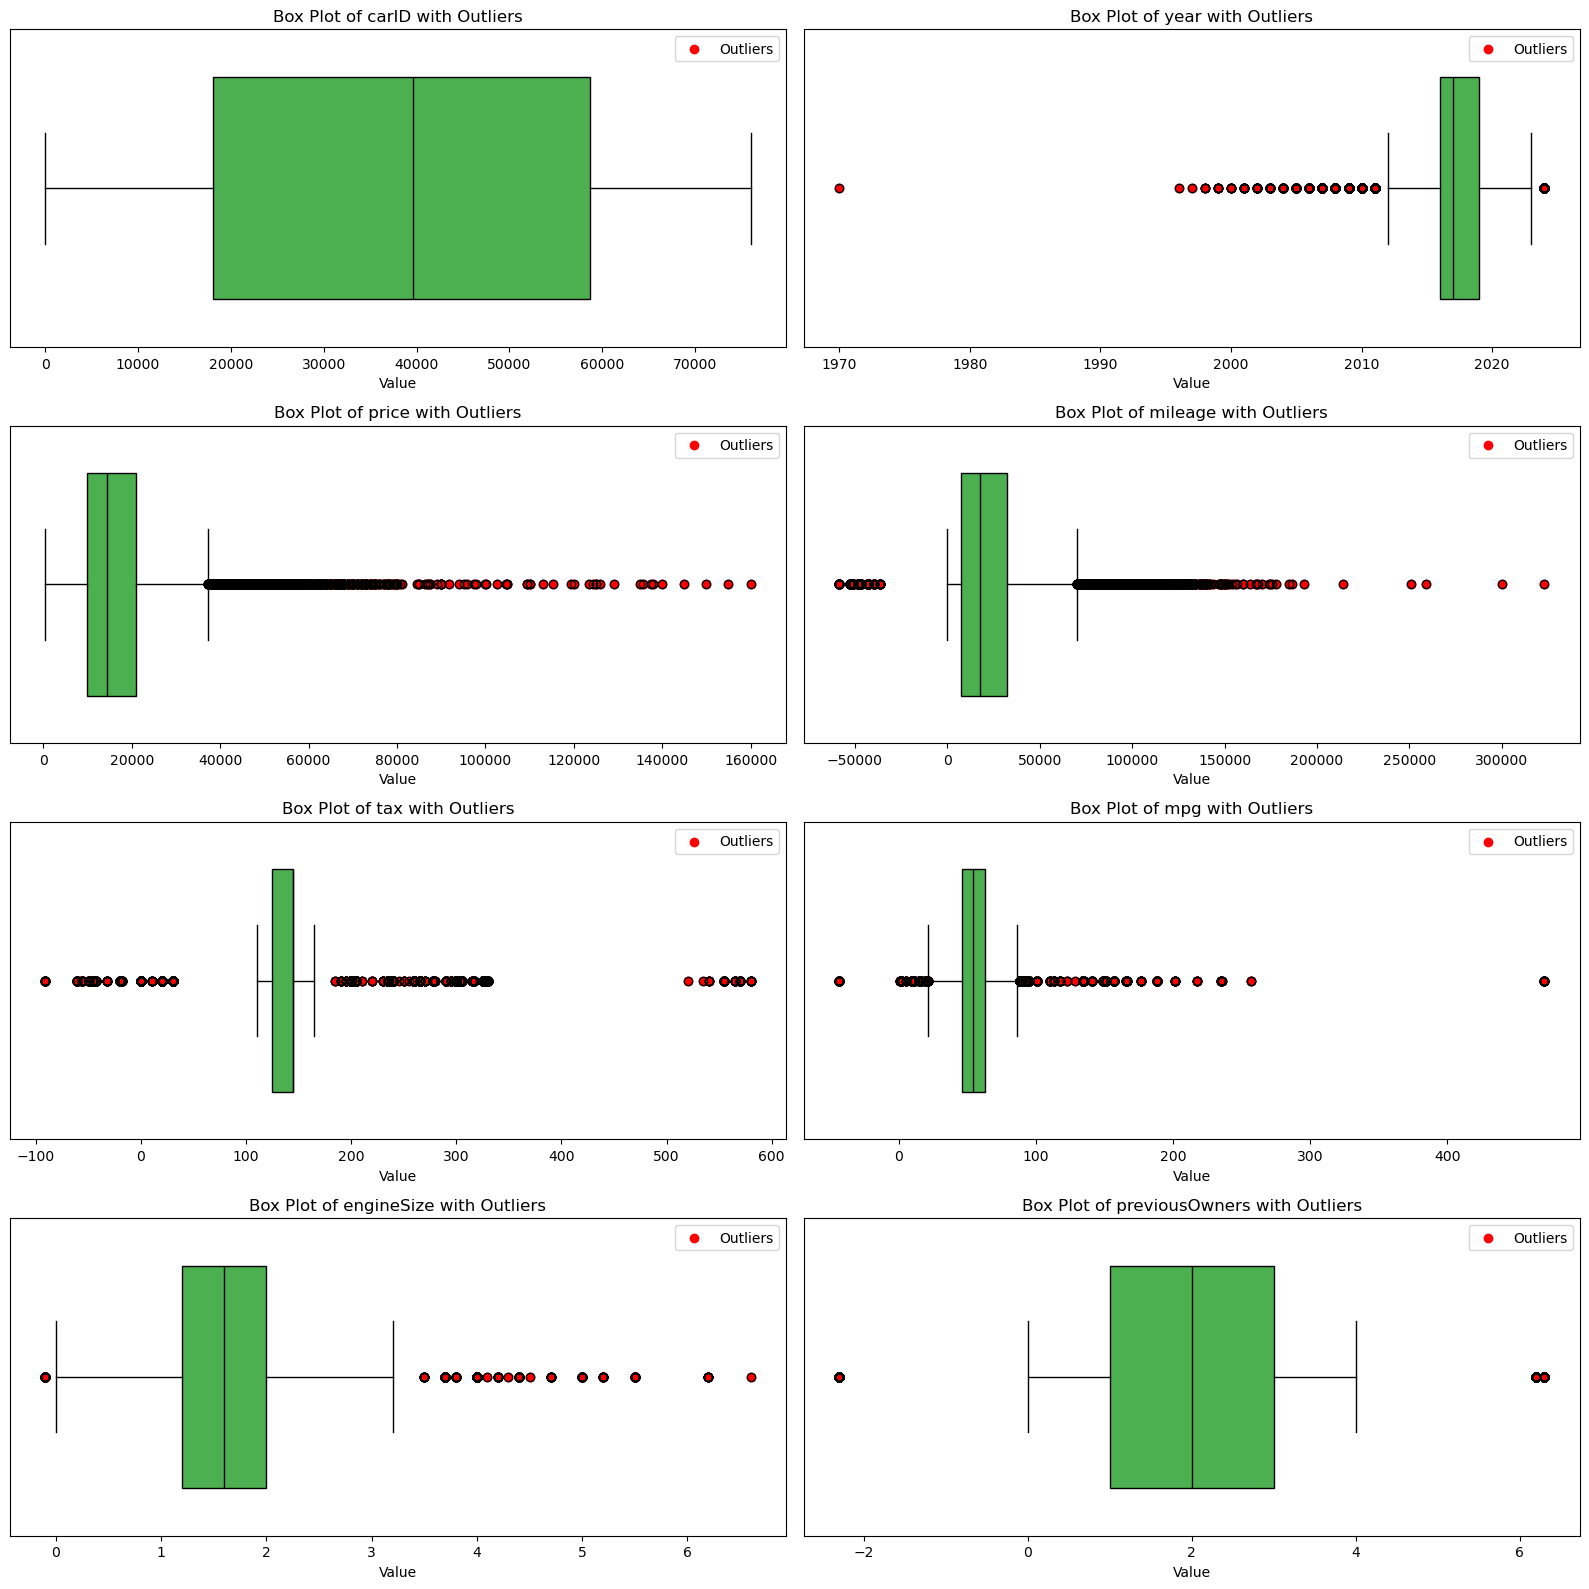

In [4]:
f.plot_multiple_boxes_with_outliers(train_db.dropna(), train_db_numerical)

- We can imideatly spot some issues on the graphs, including absurd values and values that don't make sense

In [5]:
# Removed replace absurd/incorrect values with NaN for them later to be filled
train_db.loc[train_db["mileage"] < 0, "mileage"] = np.nan
train_db.loc[~train_db["tax"].between(0, 400), "tax"] = np.nan
train_db.loc[~train_db["mpg"].between(0, 150), "mpg"] = np.nan
train_db.loc[~train_db["engineSize"].between(1, 6), "engineSize"] = np.nan
train_db.loc[~train_db["year"].between(1990, 2020), "year"] = np.nan
train_db.loc[~train_db["previousOwners"].between(0, 4), "previousOwners"] = np.nan


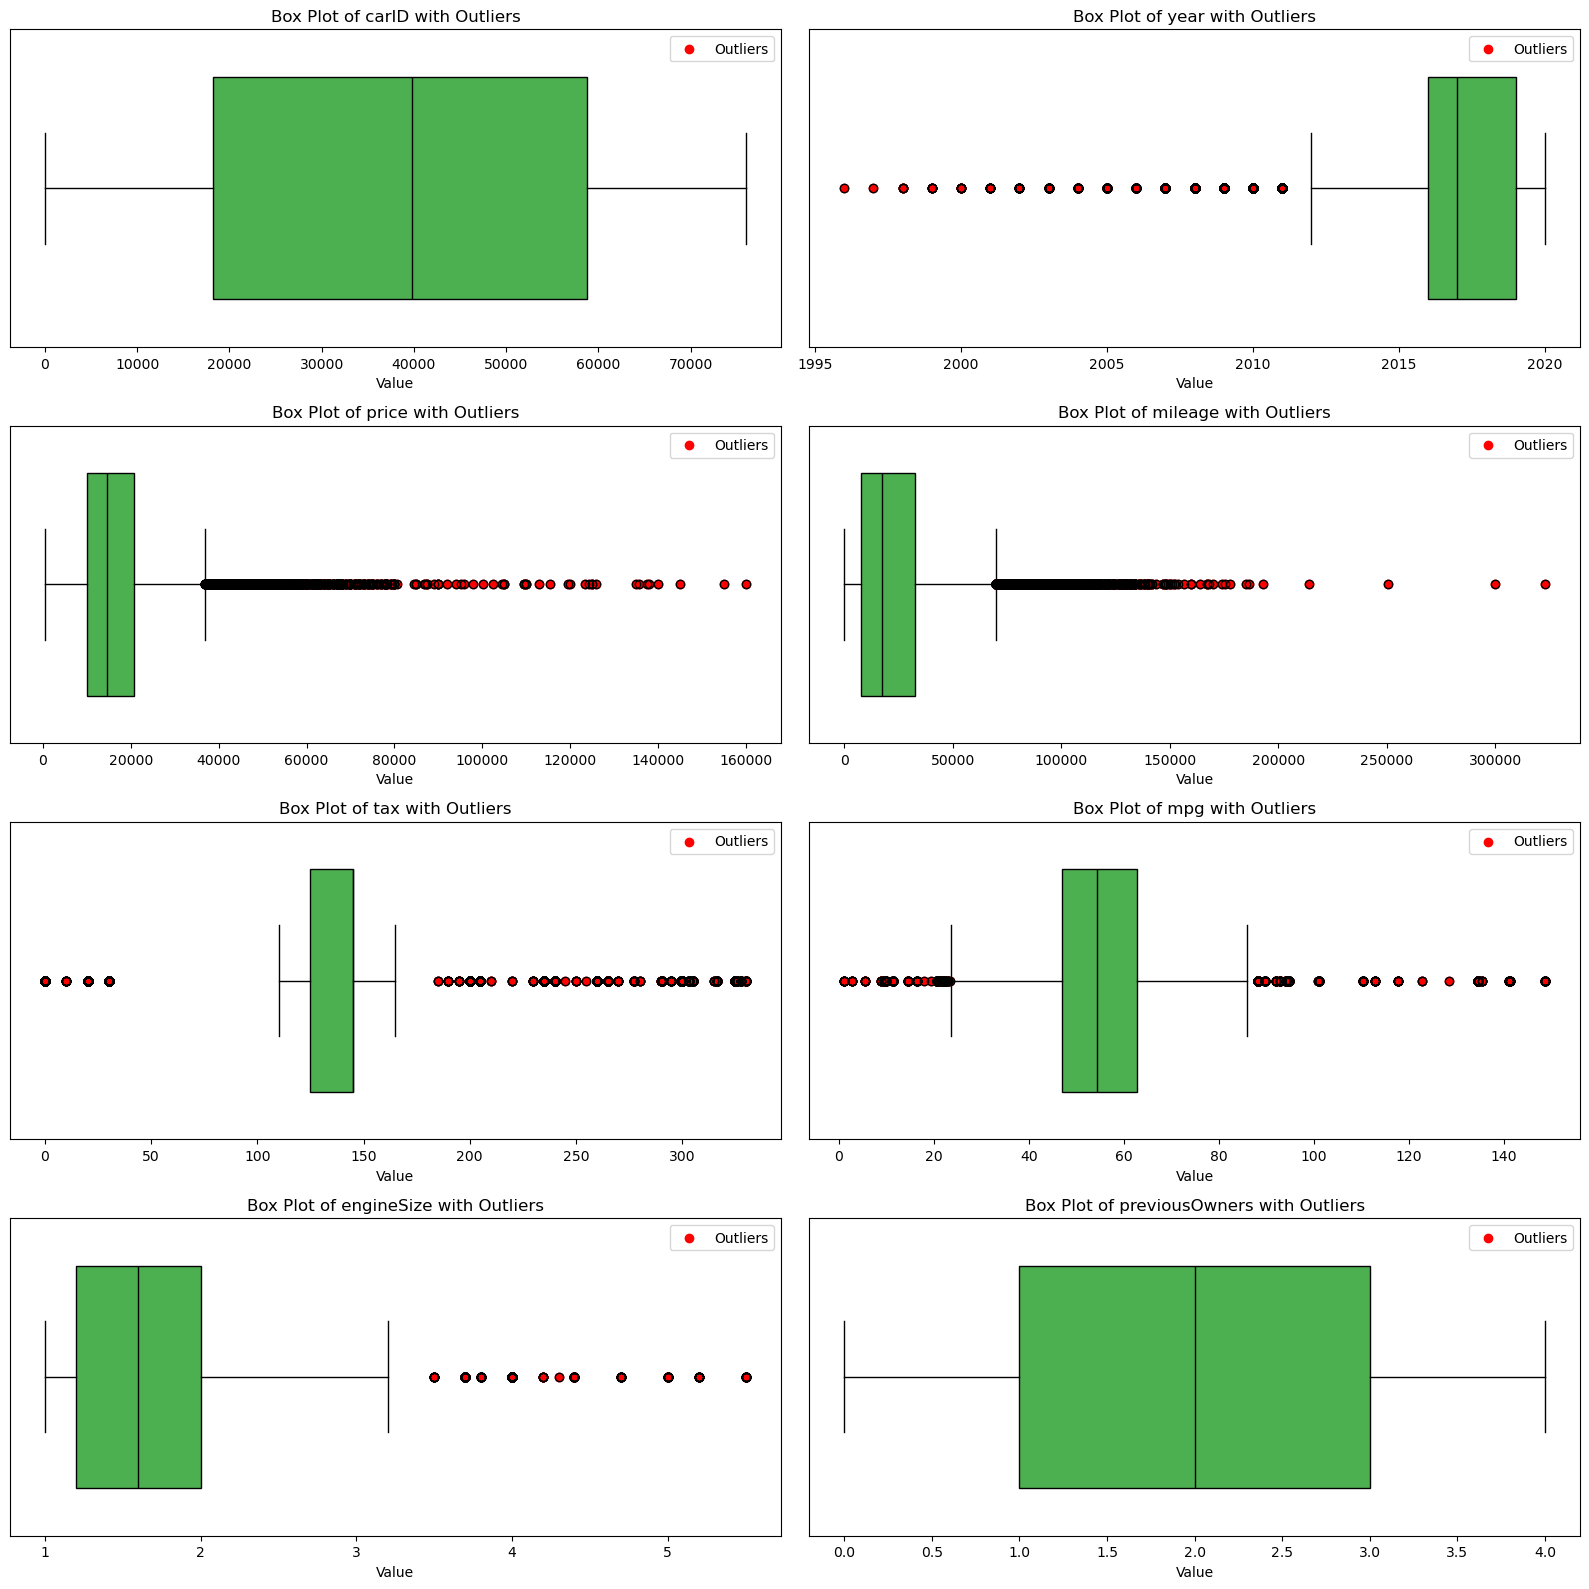

In [6]:
f.plot_multiple_boxes_with_outliers(train_db.dropna(), train_db_numerical)

#### Next we apply log(1 + x) transformation to reduce skewness and normalize distribution
#### This will help our model handle right-skewed variables better
#### We will also aplly a clipping cap to the tax's and enfineSize's 1% and 99% in order to reduce the effects of the outliers on the final outcome

In [36]:
train_db['price'] = np.log1p(train_db['price'])
train_db['mileage'] = np.log1p(train_db['mileage'])
train_db['mpg'] = np.log1p(train_db['mpg'])

# Identify lower and upper bounds for the 'tax' feature at the 1st and 99th percentiles
# This is used to remove extreme outliers that could distort the model
tax_lower, tax_upper = train_db['tax'].quantile([0.01, 0.99])

# Clip (cap) 'tax' values to the 1%–99% range to limit outlier influence
train_db['tax'] = train_db['tax'].clip(tax_lower, tax_upper)

# Apply log(1 + x) transformation to 'tax' for normalization
train_db['tax'] = np.log1p(train_db['tax'])

# Do the same outlier clipping process for the 'engineSize' feature
engineSize_lower, engineSize_upper = train_db['engineSize'].quantile([0.01, 0.99])
train_db['engineSize'] = train_db['engineSize'].clip(engineSize_lower, engineSize_upper)


c:\ProgramData\anaconda3\envs\Fall25267\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


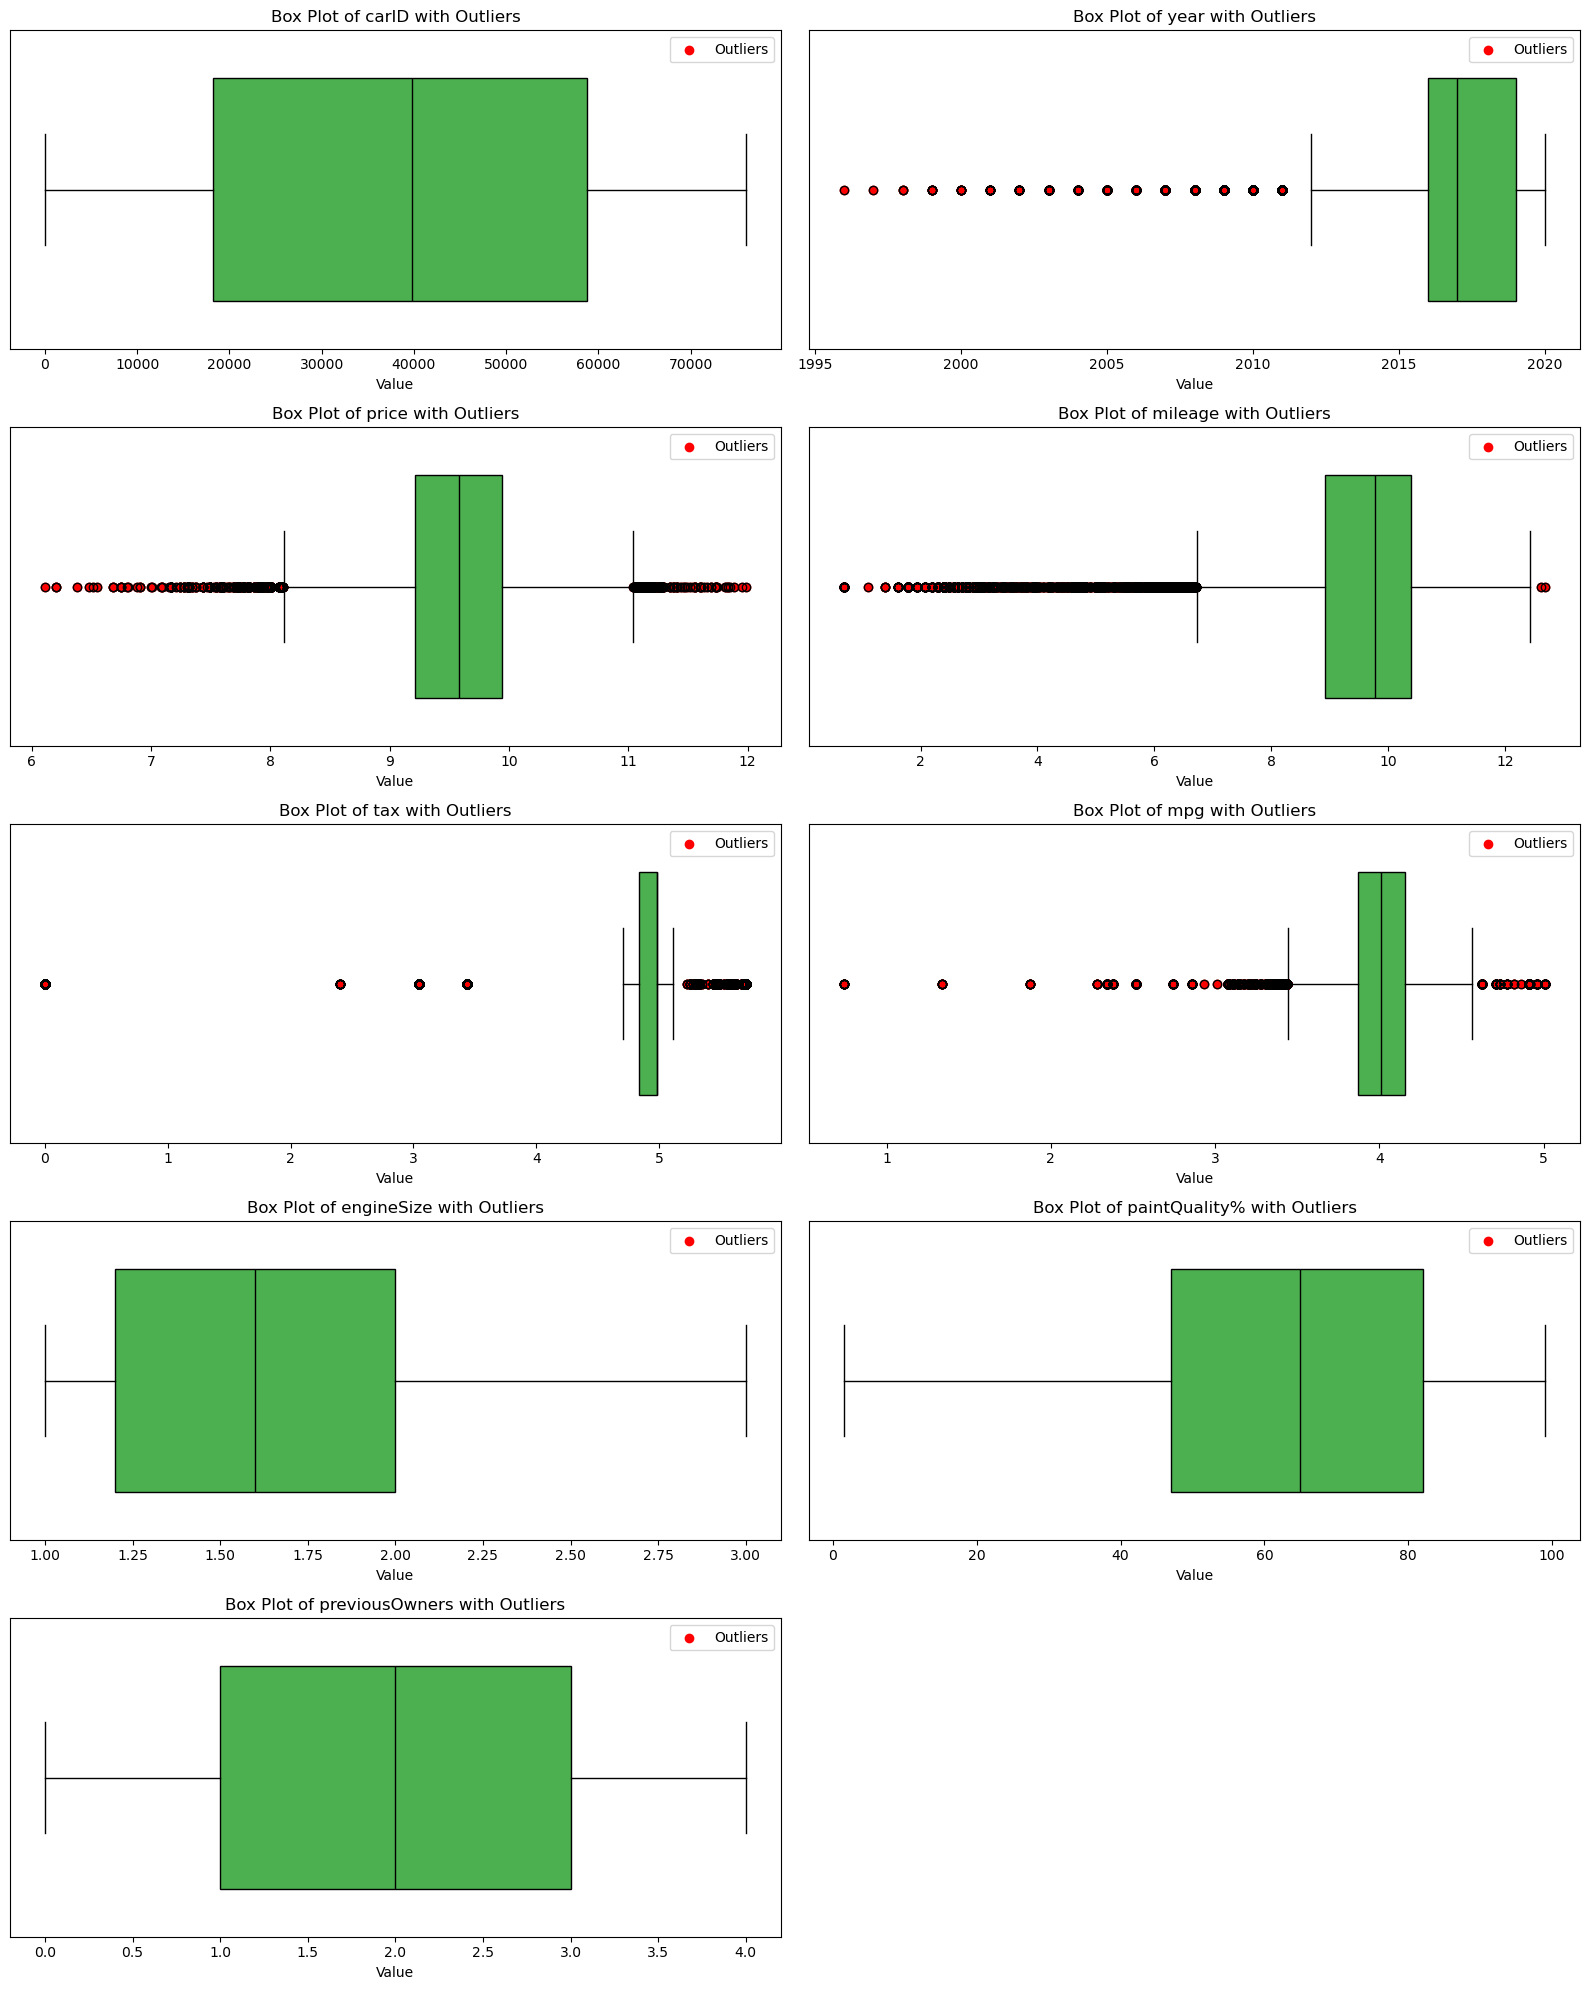

In [45]:
f.plot_multiple_boxes_with_outliers(train_db.dropna(), train_db_numerical)

## **Variable Relationships**

### Our goal here is to find the best relationship between variables so we can, more accuratly, fill the missing values

First we tried to find the relation between categorical variables using Cramér's V, but we realized that the variables might be directionally related

In [8]:
cat_cols = train_db.select_dtypes(include=['object']).columns

# Compute Cramér's V between all pairs
for i, col1 in enumerate(cat_cols):
    for col2 in cat_cols[i+1:]:
        v = f.cramers_v(train_db[col1], train_db[col2])
        print(f"Cramér's V between {col1} and {col2}: {v:.3f}")

Cramér's V between Brand and model: 0.995
Cramér's V between Brand and transmission: 0.299
Cramér's V between Brand and fuelType: 0.278
Cramér's V between model and transmission: 0.363
Cramér's V between model and fuelType: 0.489
Cramér's V between transmission and fuelType: 0.199


So we ended up going with a Theil's U directional relationship, while also testing out different variable combinations

In [9]:
num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns


# Try single and multi-column combinations up to this size
max_combo_size = 3

print("\nTheil’s U directionally for Categorical Variables:")
for target in cat_cols:
    u_scores = {}
    
    for combo_size in range(1, max_combo_size + 1):
        for combo in combinations([c for c in cat_cols if c != target], combo_size):
            # Build a joint predictor variable by concatenating category values
            joint_name = " + ".join(combo)
            joint_var = train_db[list(combo)].astype(str).agg("_".join, axis=1)
            
            # Directional association: how much knowing combo tells about target
            u = f.theils_u(train_db[target], joint_var)
            u_scores[joint_name] = u

    # Pick top combinations that best explain target
    top3 = sorted(u_scores.items(), key=lambda x: x[1], reverse=True)[:3]
    
    print(f"\nFor categorical column '{target}', best predictors:")
    for combo, u in top3:
        print(f"  U({target} | {combo}) = {u:.3f}")



Theil’s U directionally for Categorical Variables:

For categorical column 'Brand', best predictors:
  U(Brand | model + transmission + fuelType) = 0.982
  U(Brand | model + transmission) = 0.981
  U(Brand | model + fuelType) = 0.979

For categorical column 'model', best predictors:
  U(model | Brand + transmission + fuelType) = 0.562
  U(model | Brand + fuelType) = 0.538
  U(model | Brand + transmission) = 0.519

For categorical column 'transmission', best predictors:
  U(transmission | Brand + model + fuelType) = 0.326
  U(transmission | model + fuelType) = 0.316
  U(transmission | Brand + model) = 0.291

For categorical column 'fuelType', best predictors:
  U(fuelType | Brand + model + transmission) = 0.403
  U(fuelType | model + transmission) = 0.396
  U(fuelType | Brand + model) = 0.360


- We initially attempted to convert the numerical variables into categorical ones using binning so that they could be included in Theil's U calculation. However, this approach worsened the overall results, so we decided to focus solely on comparing the categorical variables.

We also explored the relationships between numerical target features and the possible combinations of numerical and categorical features. In this case, converting numerical features into bins and mixing them with categorical variables actually produced positive results.

In [10]:
for target in num_cols:
    scores = {}

    for num_paired in range(1, 3):
        # Numeric predictor combinations
        for combo in combinations([c for c in num_cols if c != target], num_paired):
            df = train_db[list(combo) + [target]].dropna()
            if df.empty:
                continue
            model = LinearRegression().fit(df[list(combo)], df[target])
            scores[combo] = model.score(df[list(combo)], df[target])

        # Categorical predictor combinations
        for cat_pair in combinations(cat_cols, num_paired):
            combined = train_db[list(cat_pair)].astype(str).agg('_'.join, axis=1)
            scores[cat_pair] = f.correlation_ratio(combined, train_db[target]) ** 2


    # Mixed numeric + categorical pairs
    for num_col in [c for c in num_cols if c != target]:
        for cat_col in cat_cols:
            df = train_db[[num_col, cat_col, target]].dropna()
            if df.empty:
                continue
            # Discretize numeric variable into bins and combine with categorical
            numeric_bins = pd.cut(df[num_col], bins=15, duplicates='drop').astype(str)
            combined = df[cat_col].astype(str) + "_" + numeric_bins
            scores[(num_col, cat_col)] = f.correlation_ratio(combined, df[target]) ** 2

    # Top 3 helpers 
    top3 = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"\nFor numerical column '{target}', top helpers (R² or η²):")
    for combo, score in top3:
        print(f" {combo} => {score:.3f}")



For numerical column 'year', top helpers (R² or η²):
 ('mileage', 'model') => 0.579
 ('mileage', 'fuelType') => 0.511
 ('mileage', 'Brand') => 0.507

For numerical column 'mileage', top helpers (R² or η²):
 ('year', 'model') => 0.492
 ('year', 'Brand') => 0.456
 ('year', 'fuelType') => 0.454

For numerical column 'tax', top helpers (R² or η²):
 ('year', 'model') => 0.469
 ('mpg', 'model') => 0.438
 ('mpg', 'Brand') => 0.361

For numerical column 'mpg', top helpers (R² or η²):
 ('model', 'fuelType') => 0.556
 ('tax', 'model') => 0.489
 ('engineSize', 'model') => 0.463

For numerical column 'engineSize', top helpers (R² or η²):
 ('mpg', 'model') => 0.787
 ('tax', 'model') => 0.737
 ('model', 'fuelType') => 0.726

For numerical column 'previousOwners', top helpers (R² or η²):
 ('mileage', 'model') => 0.022
 ('year', 'model') => 0.015
 ('mpg', 'model') => 0.010


## **Filling in missing values**

We split the dataframe into two groups, one to train the model, and the other to validate it

In [37]:
train_set, val_set = train_test_split(
    train_db,
    test_size=0.3,
    random_state=0,
    shuffle=True
)


In [ ]:
"""# Safely convert previousOwners and year to nullable integers
train_db["previousOwners"] = pd.to_numeric(train_db["previousOwners"], errors='coerce').round().astype("Int64")
train_db["year"] = pd.to_numeric(train_db["year"], errors='coerce').round().astype("Int64")

# Handle Brand for i3
idx_to_drop = train_db[(train_db['model'] == 'i3') & (train_db['Brand'].isna())].index
train_db = train_db.drop(idx_to_drop)

# Fill categorical columns
train_db = f.fill_NaN_with_categorical(train_db, "Brand", ["model","transmission","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "Brand", ["model","transmission"]) # second best filling combination so we can best assure it gets filled 
train_db = f.fill_NaN_with_categorical(train_db, "model", ["Brand","transmission","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "model", ["Brand","transmission"]) # second best filling combination so we can best assure it gets filled 
train_db = f.fill_NaN_with_categorical(train_db, "mpg", ["model","fuelType"])
train_db["transmission"] = train_db["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
train_db["fuelType"] = train_db["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Fill numeric columns with mixed helper approach
train_db = f.fill_NaN_with_mixed(train_db, "year", "model", "mileage")
train_db = f.fill_NaN_with_mixed(train_db, "mileage", "model", "year")
train_db = f.fill_NaN_with_mixed(train_db, "tax", "model", "year")
train_db = f.fill_NaN_with_mixed(train_db, "engineSize", "model", "tax")

# Fill numeric columns with median
train_db["previousOwners"] = train_db["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64")

# Drop any remaining NaNs
train_db = train_db.dropna()"""


In [38]:
def preprocess(df):
    df = df.copy()

    # Safely convert previousOwners and year to nullable integers
    df["previousOwners"] = (pd.to_numeric(df["previousOwners"], errors='coerce').round().astype("Int64")
    )
    df["year"] = (pd.to_numeric(df["year"], errors='coerce').round().astype("Int64"))

    # Handle Brand for i3
    idx_to_drop = df[(df['model'] == 'i3') & (df['Brand'].isna())].index
    df = df.drop(idx_to_drop)

    # Fill categorical columns
    df = f.fill_NaN_with_categorical(df, "Brand", ["model","transmission","fuelType"])
    df = f.fill_NaN_with_categorical(df, "Brand", ["model","transmission"])
    df = f.fill_NaN_with_categorical(df, "model", ["Brand","transmission","fuelType"])
    df = f.fill_NaN_with_categorical(df, "model", ["Brand","transmission"])
    df = f.fill_NaN_with_categorical(df, "mpg", ["model","fuelType"])
    df["transmission"] = df["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    df["fuelType"] = df["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

    # Fill numeric columns with mixed helper approach
    df = f.fill_NaN_with_mixed(df, "year", "model", "mileage")
    df = f.fill_NaN_with_mixed(df, "mileage", "model", "year")
    df = f.fill_NaN_with_mixed(df, "tax", "model", "year")
    df = f.fill_NaN_with_mixed(df, "engineSize", "model", "tax")

    # Fill numeric columns with median
    df["previousOwners"] = (df["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64"))

    # Drop any remaining NaNs
    df = df.dropna()

    return df


In [39]:
train_set = preprocess(train_set)
val_set = preprocess(val_set)

In [59]:
train_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75866 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75866 non-null  int64  
 1   Brand           75866 non-null  object 
 2   model           75866 non-null  object 
 3   year            75866 non-null  Int64  
 4   price           75866 non-null  float64
 5   transmission    75866 non-null  object 
 6   mileage         75866 non-null  float64
 7   fuelType        75866 non-null  object 
 8   tax             75866 non-null  float64
 9   mpg             75866 non-null  float64
 10  engineSize      75866 non-null  float64
 11  paintQuality%   75866 non-null  float64
 12  previousOwners  75866 non-null  Int64  
dtypes: Int64(2), float64(6), int64(1), object(4)
memory usage: 8.2+ MB


- Now no variable has missing values

# **Feature Selection**

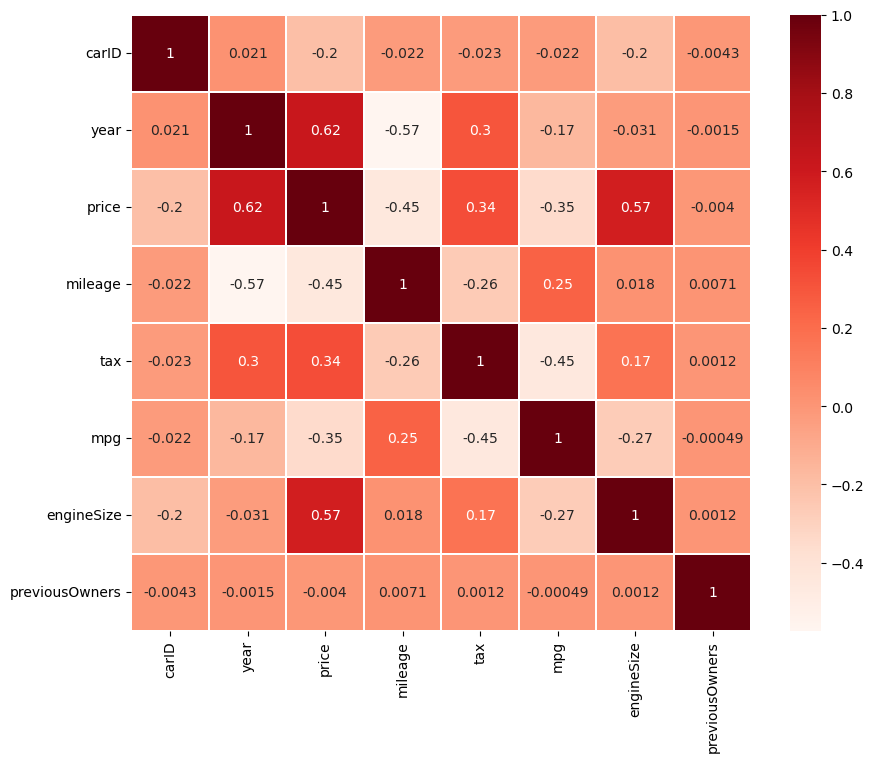

In [14]:
# Remove rows with missing values
temp = train_set.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=["number"])

# Compute the Pearson correlation matrix
correlation_matrix = corr_data.corr(method="pearson")

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = plt.cm.Reds, linewidths=0.1)
plt.show()

- year and mileage have a strong relationship
- and so does tax and pmg
- both paintQuality% and previousOwners seem to have little correlation with every variable

We need to encode categorical variables into numericals, and we decided to encode Brand transmission and fuelType with one-hot encoding, and we also created a Brand_model_encoded where, using kfold traget encode, we can achieve a numerical model without having to worry about different brands having models with the same name

In [ ]:
"""one_hot = pd.get_dummies(train_db["Brand"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot], axis=1)

train_db['transmission'] = train_db['transmission'].replace('other', 'unknown')

one_hot2 = pd.get_dummies(train_db["transmission"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot2], axis=1)

train_db["fuelType"] = train_db["fuelType"].replace('other', 'electric')

one_hot3 = pd.get_dummies(train_db["fuelType"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot3], axis=1)

train_db = f.kfold_target_encode(train_db, cat_cols=['Brand','model'], target_col='price', n_splits=5)"""

In [40]:
def encode_features(df):
    df = df.copy()

    # One-hot encode Brand
    one_hot_brand = pd.get_dummies(df["Brand"], drop_first=True).astype(int)
    df = pd.concat([df, one_hot_brand], axis=1)

    # Encode transmission 
    df['transmission'] = df['transmission'].replace('other', 'unknown')
    one_hot_trans = pd.get_dummies(df["transmission"], drop_first=True).astype(int)
    df = pd.concat([df, one_hot_trans], axis=1)

    # Encode fuelType
    df["fuelType"] = df["fuelType"].replace('other', 'electric')
    one_hot_fuel = pd.get_dummies(df["fuelType"], drop_first=True).astype(int)
    df = pd.concat([df, one_hot_fuel], axis=1)

    # K-fold target encoding
    df = f.kfold_target_encode(df,cat_cols=['Brand', 'model'],target_col='price',n_splits=5)

    return df


In [41]:
train_set = encode_features(train_set)
val_set = encode_features(val_set)

In [42]:
X_train = train_set.drop(columns=["price", "carID"])
y_train = train_set["price"]

X_val = val_set.drop(columns=["price", "carID"])
y_val = val_set["price"]

X has the numeric variables extracted and scaled

In [43]:
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)

# repeat for val

X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)

In [44]:
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)

X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)


#show results
X_train_num_scaled

,year,mileage,tax,mpg,engineSize,previousOwners,bmw,ford,hyundai,mercedes,...,skoda,toyota,vw,manual,semi-auto,unknown,electric,hybrid,petrol,Brand_model_encoded
74681,0.888889,0.540544,0.873228,0.555453,1.00,0.625,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.650537
47438,0.833333,0.689538,0.533461,0.622495,0.30,0.500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.501064
74144,0.870370,0.761504,0.873228,0.634490,0.55,0.750,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.634637
53441,0.888889,0.676642,0.879128,0.590568,0.20,0.625,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.413419
53978,0.907407,0.729615,0.873228,0.538155,0.50,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.556177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0.907407,0.648986,0.873228,0.630481,0.30,0.375,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.621964
45891,0.777778,0.900546,0.929245,0.580603,0.50,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.621862
42613,0.907407,0.567278,0.873228,0.581360,0.00,0.500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.522029
43567,0.870370,0.801355,0.847413,0.614780,0.50,0.500,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.619333


Checking the categorical variables correlation with the target

In [45]:
for var in X_train_cat:
    f.TestCorrelationRatio(X_train_cat[var],y_train, var)

Brand is IMPORTANT for prediction (η = 0.562)
model is IMPORTANT for prediction (η = 0.751)
transmission is IMPORTANT for prediction (η = 0.565)
fuelType is IMPORTANT for prediction (η = 0.252)


Calculated the optimal number of features for a Linear Regression

In [46]:
#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 20
Score with 20 features: 0.885520


In [47]:
model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = 20)

train_db_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [23]:
X_train_num_scaled.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'bmw',
       'ford', 'hyundai', 'mercedes', 'opel', 'skoda', 'toyota', 'vw',
       'manual', 'semi-auto', 'unknown', 'electric', 'hybrid', 'petrol',
       'Brand_model_encoded'],
      dtype='object')

In [108]:
rfe.ranking_

array([1, 1, 2, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

year                    True
mileage                 True
tax                     True
mpg                     True
engineSize              True
previousOwners         False
bmw                     True
ford                    True
hyundai                 True
mercedes                True
opel                    True
skoda                   True
toyota                  True
vw                      True
manual                  True
semi-auto               True
unknown                 True
electric                True
hybrid                  True
petrol                  True
Brand_model_encoded     True
dtype: bool

Check the feature importance with the LassoCV

In [48]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

reg = LassoCV()


reg.fit(X_train_num_scaled, y_train)

coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 20 variables and eliminated the other 1 variables


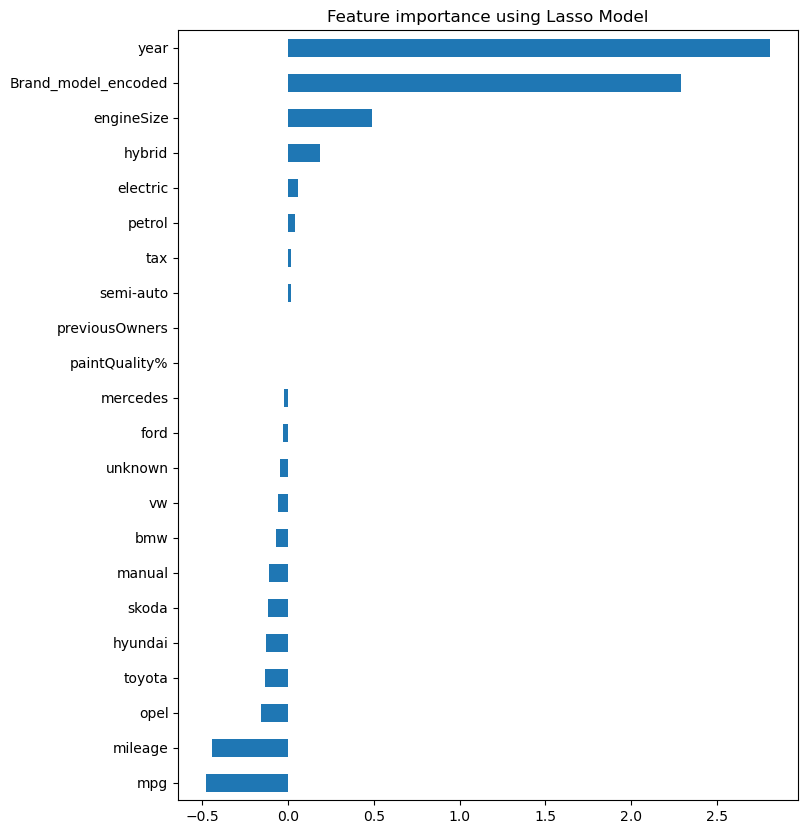

In [163]:
plot_importance(coef,'Lasso')

<hr>

### Numerical Data

| Predictor | Pearson | RFE LR| Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |---|
| year | Keep? | Keep | Keep | Include in the model |
| engineSize | Keep | Keep |Keep| Include in the model |
| tax | Keep?| Discard? | Discard | Try with and without |
| previousOwners | Keep? | Discard | Discard | Discard |
| mpg | Keep? | Keep | Keep? | Try with and without |
| mileage | Keep? | Keep | Keep | Keep |

<hr>


### Categorical Data

| Predictor | Correlation Ratio | 
| --- | --- | 
| Brand | Keep |  
|  model | Keep | 
| transmission | Keep |
| fuelType| Keep? |


<hr>



After testing out different combinations, we came to the conclusion that dropping previousOwners had the best return

In [49]:
X_train_num_scaled = X_train_num_scaled.drop(columns=['previousOwners'])

X_val_num_scaled = X_val_num_scaled.drop(columns=['previousOwners'])

In [50]:
# 3. Fit model
model = LinearRegression()
model.fit(X_train_num_scaled, y_train)

# 4. Predict
y_pred = model.predict(X_val_num_scaled)

# 5. Evaluate
print(f"R²: {r2_score(y_val, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_val, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred)):.2f}")

R²: 0.886
MAE: 0.13
RMSE: 0.18


Now we apply all the methods we analysed to the Linear Regression model

In [51]:
# Drop irrelevant column
test_db = test_db.drop(columns=["hasDamage","paintQuality%"])

# Lowercase text columns
text_cols = test_db.select_dtypes(include=["object"]).columns
test_db[text_cols] = test_db[text_cols].apply(lambda x: x.str.lower() if x.dtype=="object" else x)

# Loop and fix all categorical columns (if your fix_typos function works for test set)
for col in test_db.select_dtypes(include="object").columns:
    test_db = f.fix_typos(col, test_db)

# Apply the same filtering rules
test_db.loc[test_db["mileage"] < 0, "mileage"] = np.nan
test_db.loc[~test_db["tax"].between(0, 400), "tax"] = np.nan
test_db.loc[~test_db["mpg"].between(0, 150), "mpg"] = np.nan
test_db.loc[~test_db["engineSize"].between(1, 6), "engineSize"] = np.nan
test_db.loc[~test_db["year"].between(1990, 2020), "year"] = np.nan
test_db.loc[~test_db["previousOwners"].between(0, 4), "previousOwners"] = np.nan



# Apply the same transformations
test_db['mileage'] = np.log1p(test_db['mileage'])
test_db['mpg'] = np.log1p(test_db['mpg'])

# Use the SAME clipping bounds from training data
test_db['tax'] = test_db['tax'].clip(tax_lower, tax_upper)
test_db['tax'] = np.log1p(test_db['tax'])

# Use the SAME clipping bounds from training data  
test_db['engineSize'] = test_db['engineSize'].clip(engineSize_lower, engineSize_upper)

# Rounding future Int values
test_db.loc[:, "year"] = test_db["year"].round()

# Remove negative/irrational previousOwners
test_db.loc[(test_db['previousOwners'] < 0) | (test_db['previousOwners'] % 1 != 0),'previousOwners'] = np.nan

# Round floats to 1 digit
for col in test_db.select_dtypes(include="float64").columns:
    test_db[col] = test_db[col].round(1)



# Remove negative values from numeric columns
for col in test_db.select_dtypes(include="float64").columns:
    test_db = f.negative_to_nan_columns(col, test_db)

# Safely convert previousOwners and year to nullable integers
test_db["previousOwners"] = pd.to_numeric(test_db["previousOwners"], errors='coerce').round().astype("Int64")
test_db["year"] = pd.to_numeric(test_db["year"], errors='coerce').round().astype("Int64")

# Fill categorical columns using the same functions as training
test_db = f.fill_NaN_with_categorical(test_db, "Brand", ["model","transmission","fuelType"])
test_db = f.fill_NaN_with_categorical(test_db, "Brand", ["model","transmission"])
test_db = f.fill_NaN_with_categorical(test_db, "model", ["Brand","transmission","fuelType"])
test_db = f.fill_NaN_with_categorical(test_db, "model", ["Brand","transmission"])
test_db = f.fill_NaN_with_categorical(test_db, "mpg", ["model","fuelType"])
test_db["transmission"] = test_db["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test_db["fuelType"] = test_db["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Fill numeric columns with mixed helper approach
test_db = f.fill_NaN_with_mixed(test_db, "year", "model", "mileage")
test_db = f.fill_NaN_with_mixed(test_db, "mileage", "model", "year")
test_db = f.fill_NaN_with_mixed(test_db, "tax", "model", "year")
test_db = f.fill_NaN_with_mixed(test_db, "engineSize", "model", "tax")


# Fill numeric columns with median
test_db["previousOwners"] = test_db["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64")

numeric_cols = test_db.select_dtypes(include=["number"]).columns.drop("carID", errors='ignore')

for col in numeric_cols:
    # Convert to float to safely handle NaNs and group means
    test_db[col] = test_db[col].astype(float)
    
    # Compute model mean
    category_means = test_db.groupby("model")[col].transform('median')
    
    # Fill NaNs with category mean
    test_db[col] = test_db[col].fillna(category_means)
    
    # Fill any remaining NaNs with global mean
    global_mean = test_db[col].mean()
    test_db[col] = test_db[col].fillna(global_mean)
    
    # Optional: convert back to integer if column was originally integer
    if "Int64" in str(test_db[col].dtype):
        test_db[col] = test_db[col].round().astype("Int64")



        
# One-hot encode categorical columns
brand_dummies = pd.get_dummies(test_db["Brand"], drop_first=True).astype(int)
test_db = pd.concat([test_db, brand_dummies], axis=1)

# Merge rare transmission values
test_db['transmission'] = test_db['transmission'].replace('other', 'unknown')
transmission_dummies = pd.get_dummies(test_db["transmission"], drop_first=True).astype(int)
test_db = pd.concat([test_db, transmission_dummies], axis=1)

# Merge rare fuelType values
test_db["fuelType"] = test_db["fuelType"].replace('other', 'electric')
fuel_dummies = pd.get_dummies(test_db["fuelType"], drop_first=True).astype(int)
test_db = pd.concat([test_db, fuel_dummies], axis=1)


# Create mapping dictionary from training data using both Brand and model
mapping = (
    train_set
    .set_index(["Brand", "model"])["Brand_model_encoded"]
    .to_dict()
)

# Compute global mean for unseen Brand-model pairs
global_mean = train_set["Brand_model_encoded"].median()

# Map test_df (Brand, model) pairs to encoded values
test_db["Brand_model_encoded"] = (
    test_db[["Brand", "model"]]
    .apply(lambda x: mapping.get((x["Brand"], x["model"]), global_mean), axis=1)
)


# Prepare features (exclude price and ID if present)
X_test = test_db.drop(columns=["carID"], errors='ignore')  # ignore if price not in test
X_test_num = X_test.select_dtypes(include=np.number).set_index(X_test.index)

# Scale using the same scaler fitted on training data
X_test_num_scaled = scaler.transform(X_test_num)

X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns).set_index(X_test.index)

X_test_num_scaled = X_test_num_scaled.drop(columns=[ 'previousOwners'])

In [52]:
y_test_pred = model.predict(X_test_num_scaled)

# Add predictions to the test DataFrame
test_db['price'] = np.expm1(y_test_pred)

# Create a new DataFrame with only carID and predicted price
submission = test_db[['carID', 'price']].copy()

# Save to CSV
submission.to_csv("predicted_prices.csv", index=False)


In [ ]:
"""



































































"""

# **Random Forest**

### **Import data sets**

In [116]:
train_db = pd.read_csv("./train.csv")
test_db = pd.read_csv("./test.csv")

# **Fixing issues**

In [117]:
# Drop irrelevant column that can only be obtained by the mechanic
train_db = train_db.drop(columns=["hasDamage","paintQuality%"])

train_db_numerical = train_db.select_dtypes(exclude=["object"]).columns
# Lowercase text columns
train_db_categorical = train_db.select_dtypes(include=["object"]).columns
train_db[train_db_categorical] = train_db[train_db_categorical].apply(lambda x: x.str.lower() if x.dtype=="object" else x)


# Loop and fix all categorical columns
for col in train_db_categorical:
    train_db = f.fix_typos(col, train_db)

# Rounding future Int values
train_db.loc[:, "year"] = train_db["year"].round()

# Rounds every other irrational number into having one precision digit
for col in train_db.select_dtypes(include="float64").columns:
    # Round each column to 1 digit after the decimal
    train_db[col] = train_db[col].round(1)

### **Outlier treatment**

Since we are using Random Forest here, after some tests, we concluded that it is best to leave every value in, even if absurd

## **Variable Relationships**

This segment follow the same exact logic as the linear regression

### Our goal here is to find the best relationship between variables so we can, more accuratly, fill the missing values

First we tried to find the relation between categorical variables using Cramér's V, but we realized that the variables might be directionally related

In [118]:
num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns


# Try single and multi-column combinations up to this size
max_combo_size = 3

print("\nTheil’s U directionally for Categorical Variables:")
for target in cat_cols:
    u_scores = {}
    
    for combo_size in range(1, max_combo_size + 1):
        for combo in combinations([c for c in cat_cols if c != target], combo_size):
            # Build a joint predictor variable by concatenating category values
            joint_name = " + ".join(combo)
            joint_var = train_db[list(combo)].astype(str).agg("_".join, axis=1)
            
            # Directional association: how much knowing combo tells about target
            u = f.theils_u(train_db[target], joint_var)
            u_scores[joint_name] = u

    # Pick top combinations that best explain target
    top3 = sorted(u_scores.items(), key=lambda x: x[1], reverse=True)[:3]
    
    print(f"\nFor categorical column '{target}', best predictors:")
    for combo, u in top3:
        print(f"  U({target} | {combo}) = {u:.3f}")



Theil’s U directionally for Categorical Variables:

For categorical column 'Brand', best predictors:
  U(Brand | model + transmission + fuelType) = 0.982
  U(Brand | model + transmission) = 0.981
  U(Brand | model + fuelType) = 0.979

For categorical column 'model', best predictors:
  U(model | Brand + transmission + fuelType) = 0.562
  U(model | Brand + fuelType) = 0.538
  U(model | Brand + transmission) = 0.519

For categorical column 'transmission', best predictors:
  U(transmission | Brand + model + fuelType) = 0.326
  U(transmission | model + fuelType) = 0.316
  U(transmission | Brand + model) = 0.291

For categorical column 'fuelType', best predictors:
  U(fuelType | Brand + model + transmission) = 0.403
  U(fuelType | model + transmission) = 0.396
  U(fuelType | Brand + model) = 0.360


- We initially attempted to convert the numerical variables into categorical ones using binning so that they could be included in Theil's U calculation. However, this approach worsened the overall results, so we decided to focus solely on comparing the categorical variables.

We also explored the relationships between numerical target features and the possible combinations of numerical and categorical features. In this case, converting numerical features into bins and mixing them with categorical variables actually produced positive results.

In [119]:
for target in num_cols:
    scores = {}

    for num_paired in range(1, 3):
        # Numeric predictor combinations
        for combo in combinations([c for c in num_cols if c != target], num_paired):
            df = train_db[list(combo) + [target]].dropna()
            if df.empty:
                continue
            model = LinearRegression().fit(df[list(combo)], df[target])
            scores[combo] = model.score(df[list(combo)], df[target])

        # Categorical predictor combinations
        for cat_pair in combinations(cat_cols, num_paired):
            combined = train_db[list(cat_pair)].astype(str).agg('_'.join, axis=1)
            scores[cat_pair] = f.correlation_ratio(combined, train_db[target]) ** 2


    # Mixed numeric + categorical pairs
    for num_col in [c for c in num_cols if c != target]:
        for cat_col in cat_cols:
            df = train_db[[num_col, cat_col, target]].dropna()
            if df.empty:
                continue
            # Discretize numeric variable into bins and combine with categorical
            numeric_bins = pd.cut(df[num_col], bins=15, duplicates='drop').astype(str)
            combined = df[cat_col].astype(str) + "_" + numeric_bins
            scores[(num_col, cat_col)] = f.correlation_ratio(combined, df[target]) ** 2

    # Top 3 helpers 
    top3 = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"\nFor numerical column '{target}', top helpers (R² or η²):")
    for combo, score in top3:
        print(f" {combo} => {score:.3f}")



For numerical column 'year', top helpers (R² or η²):
 ('mileage', 'model') => 0.546
 ('tax', 'model') => 0.487
 ('mileage', 'fuelType') => 0.470

For numerical column 'mileage', top helpers (R² or η²):
 ('year', 'engineSize') => 0.457
 ('year', 'model') => 0.455
 ('year', 'previousOwners') => 0.451

For numerical column 'tax', top helpers (R² or η²):
 ('year', 'model') => 0.471
 ('mpg', 'model') => 0.384
 ('mileage', 'model') => 0.341

For numerical column 'mpg', top helpers (R² or η²):
 ('model', 'fuelType') => 0.667
 ('engineSize', 'fuelType') => 0.497
 ('engineSize', 'model') => 0.438

For numerical column 'engineSize', top helpers (R² or η²):
 ('tax', 'model') => 0.696
 ('mpg', 'model') => 0.678
 ('model', 'fuelType') => 0.663

For numerical column 'previousOwners', top helpers (R² or η²):
 ('tax', 'model') => 0.013
 ('mileage', 'model') => 0.012
 ('year', 'model') => 0.009


## **Filling in missing values**

In [120]:
train_set, val_set = train_test_split(
    train_db,
    test_size=0.3,
    random_state=0,
    shuffle=True
)


In [ ]:
"""# Safely convert previousOwners and year to nullable integers
train_db["previousOwners"] = pd.to_numeric(train_db["previousOwners"], errors='coerce').round().astype("Int64")
train_db["year"] = pd.to_numeric(train_db["year"], errors='coerce').round().astype("Int64")

# Handle Brand for i3
idx_to_drop = train_db[(train_db['model'] == 'i3') & (train_db['Brand'].isna())].index
train_db = train_db.drop(idx_to_drop)

# Fill categorical columns
train_db = f.fill_NaN_with_categorical(train_db, "Brand", ["model","transmission","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "Brand", ["model","transmission"]) # second best filling combination so we can best assure it gets filled 
train_db = f.fill_NaN_with_categorical(train_db, "model", ["Brand","transmission","fuelType"])
train_db = f.fill_NaN_with_categorical(train_db, "model", ["Brand","transmission"]) # second best filling combination so we can best assure it gets filled 
train_db = f.fill_NaN_with_categorical(train_db, "mpg", ["model","fuelType"])
train_db["transmission"] = train_db["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
train_db["fuelType"] = train_db["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Fill numeric columns with mixed helper approach
train_db = f.fill_NaN_with_mixed(train_db, "year", "model", "mileage")
train_db = f.fill_NaN_with_mixed(train_db, "mileage", "model", "year")
train_db = f.fill_NaN_with_mixed(train_db, "tax", "model", "year")
train_db = f.fill_NaN_with_mixed(train_db, "engineSize", "model", "tax")

# Fill numeric columns with median
train_db["paintQuality%"] = train_db["paintQuality%"].transform(lambda x: x.fillna(x.median()))
train_db["previousOwners"] = train_db["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64")

# Drop any remaining NaNs
train_db = train_db.dropna()
"""

In [121]:
def preprocess(df):
    df = df.copy()

    # Safely convert previousOwners and year to nullable integers
    df["previousOwners"] = (pd.to_numeric(df["previousOwners"], errors='coerce').round().astype("Int64")
    )
    df["year"] = (pd.to_numeric(df["year"], errors='coerce').round().astype("Int64"))

    # Handle Brand for i3
    idx_to_drop = df[(df['model'] == 'i3') & (df['Brand'].isna())].index
    df = df.drop(idx_to_drop)

    # Fill categorical columns
    df = f.fill_NaN_with_categorical(df, "Brand", ["model","transmission","fuelType"])
    df = f.fill_NaN_with_categorical(df, "Brand", ["model","transmission"])
    df = f.fill_NaN_with_categorical(df, "model", ["Brand","transmission","fuelType"])
    df = f.fill_NaN_with_categorical(df, "model", ["Brand","transmission"])
    df = f.fill_NaN_with_categorical(df, "mpg", ["model","fuelType"])
    df["transmission"] = df["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    df["fuelType"] = df["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

    # Fill numeric columns with mixed helper approach
    df = f.fill_NaN_with_mixed(df, "year", "model", "mileage")
    df = f.fill_NaN_with_mixed(df, "mileage", "model", "year")
    df = f.fill_NaN_with_mixed(df, "tax", "model", "year")
    df = f.fill_NaN_with_mixed(df, "engineSize", "model", "tax")

    # Fill numeric columns with median
    df["previousOwners"] = (df["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64"))

    # Drop any remaining NaNs
    df = df.dropna()

    return df


In [122]:
train_set = preprocess(train_set)
val_set = preprocess(val_set)

# **Feature Selection**

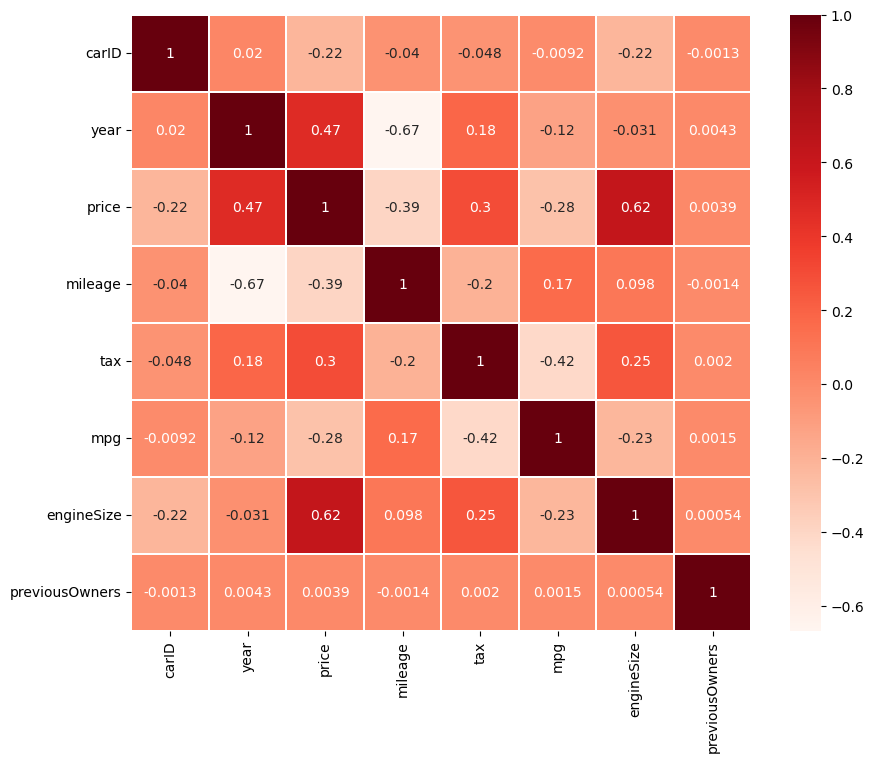

In [123]:
# Remove rows with missing values
temp = train_db.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=["number"])

# Compute the Pearson correlation matrix
correlation_matrix = corr_data.corr(method="pearson")

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = plt.cm.Reds, linewidths=0.1)
plt.show()

- year and mileage have a strong relationship
- and so does tax and pmg
- both paintQuality% and previousOwners seem to have little correlation with every variable

In [ ]:
"""one_hot = pd.get_dummies(train_db["Brand"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot], axis=1)

train_db['transmission'] = train_db['transmission'].replace('other', 'unknown')

one_hot2 = pd.get_dummies(train_db["transmission"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot2], axis=1)

train_db["fuelType"] = train_db["fuelType"].replace('other', 'electric')

one_hot3 = pd.get_dummies(train_db["fuelType"], drop_first=True).astype(int)

train_db = pd.concat([train_db, one_hot3], axis=1)

train_db = f.kfold_target_encode(train_db, cat_cols=['Brand','model'], target_col='price', n_splits=5)"""

In [124]:
def encode_features(df):
    df = df.copy()

    # One-hot encode Brand
    one_hot_brand = pd.get_dummies(df["Brand"], drop_first=True).astype(int)
    df = pd.concat([df, one_hot_brand], axis=1)

    # Encode transmission 
    df['transmission'] = df['transmission'].replace('other', 'unknown')
    one_hot_trans = pd.get_dummies(df["transmission"], drop_first=True).astype(int)
    df = pd.concat([df, one_hot_trans], axis=1)

    # Encode fuelType
    df["fuelType"] = df["fuelType"].replace('other', 'electric')
    one_hot_fuel = pd.get_dummies(df["fuelType"], drop_first=True).astype(int)
    df = pd.concat([df, one_hot_fuel], axis=1)

    # K-fold target encoding
    df = f.kfold_target_encode(df,cat_cols=['Brand', 'model'],target_col='price',n_splits=5)

    return df


In [125]:
train_set = encode_features(train_set)
val_set = encode_features(val_set)

In [126]:
X_train = train_set.drop(columns=["price", "carID"])
y_train = train_set["price"]

X_val = val_set.drop(columns=["price", "carID"])
y_val = val_set["price"]

In [127]:
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)

# repeat for val

X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)


In [128]:
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)

X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)


#show results
X_train_num_scaled

,year,mileage,tax,mpg,engineSize,previousOwners,bmw,ford,hyundai,mercedes,...,skoda,toyota,vw,manual,semi-auto,unknown,electric,hybrid,petrol,Brand_model_encoded
74681,0.888889,0.156855,0.351810,0.165111,0.462687,0.625,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.219666
47438,0.833333,0.173881,0.165549,0.201284,0.253731,0.500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.108239
74144,0.870370,0.201907,0.351810,0.209257,0.328358,0.750,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.201346
53441,0.888889,0.170951,0.359261,0.182419,0.223881,0.625,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.065929
53978,0.907407,0.186501,0.351810,0.157721,0.313433,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.138172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0.907407,0.166005,0.351810,0.206534,0.253731,0.375,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180848
45891,0.777778,0.410286,0.433765,0.177168,0.313433,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181448
42613,0.907407,0.158150,0.351810,0.177557,0.164179,0.500,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.116222
43567,0.870370,0.231607,0.322009,0.196422,0.313433,0.500,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.182483


In [129]:
for var in X_train_cat:
    f.TestCorrelationRatio(X_train_cat[var],y_train, var)

Brand is IMPORTANT for prediction (η = 0.538)
model is IMPORTANT for prediction (η = 0.760)
transmission is IMPORTANT for prediction (η = 0.545)
fuelType is IMPORTANT for prediction (η = 0.210)


In [130]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

reg = LassoCV()


reg.fit(X_train_num_scaled, y_train)

coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 21 variables and eliminated the other 0 variables


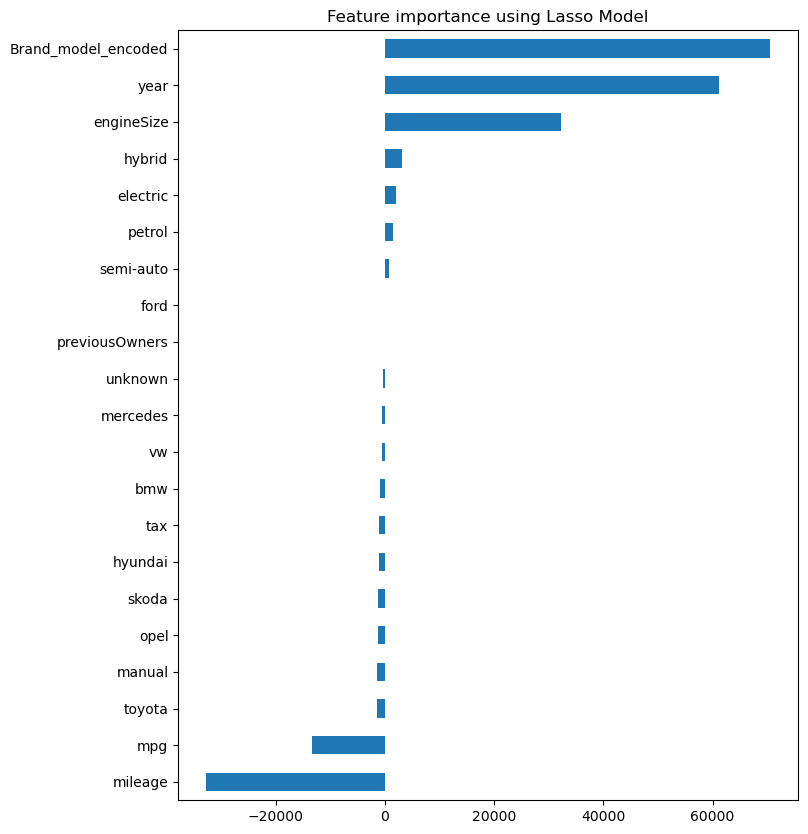

In [131]:
plot_importance(coef,'Lasso')

<hr>

### Numerical Data

| Predictor | Pearson | Lasso | What to do? (One possible way to "solve") |
| --- | --- | --- | --- |
| year | Keep? | Keep | Include in the model |
| engineSize | Keep |Keep| Include in the model |
| tax | Keep? | Discard | Try with and without |
| previousOwners | Keep? | Discard | Discard |
| paintQuality% | Keep? | Discard | Discard |
| mpg | Keep?  | Keep? | Try with and without |
| mileage | Keep | Keep | Keep |

<hr>


### Categorical Data

| Predictor | Correlation Ratio | 
| --- | --- | 
| Brand | Keep |  
|  model | Keep | 
| transmission | Keep |
| fuelType| Keep? |


<hr>




Even though we are using a random forest here, we still applied the same feature selection methods as in linear regression, and it ended up performing better than using all the features

In [132]:
X_train_num = X_train_num.drop(columns=['previousOwners'])

X_val_num = X_val_num.drop(columns=['previousOwners'])

The n_estimators was tested through trial and error

In [133]:
model = RandomForestRegressor(
    n_estimators=70,   # number of trees
    random_state=42,
    n_jobs=-1           
)
model.fit(X_train_num, y_train)

# 4. Predict
y_pred = model.predict(X_val_num)

# 5. Evaluate
print(f"R²: {r2_score(y_val, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_val, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred)):.2f}")

R²: 0.935
MAE: 1480.41
RMSE: 2486.50


Now we apply all the methods we analysed to the Random Forest model

In [ ]:
# Drop irrelevant column
test_db = test_db.drop(columns=["hasDamage","paintQuality%"])

# Lowercase text columns
text_cols = test_db.select_dtypes(include=["object"]).columns
test_db[text_cols] = test_db[text_cols].apply(lambda x: x.str.lower() if x.dtype=="object" else x)

# Loop and fix all categorical columns (if your fix_typos function works for test set)
for col in test_db.select_dtypes(include="object").columns:
    test_db = f.fix_typos(col, test_db)

# Rounding future Int values
test_db.loc[:, "year"] = test_db["year"].round()

# Remove negative/irrational previousOwners
#test_db.loc[(test_db['previousOwners'] < 0) | (test_db['previousOwners'] % 1 != 0),'previousOwners'] = np.nan

# Round floats to 1 digit
for col in test_db.select_dtypes(include="float64").columns:
    test_db[col] = test_db[col].round(1)


# Remove negative values from numeric columns
for col in test_db.select_dtypes(include="float64").columns:
    test_db = f.negative_to_nan_columns(col, test_db)

# Safely convert previousOwners and year to nullable integers
test_db["previousOwners"] = pd.to_numeric(test_db["previousOwners"], errors='coerce').round().astype("Int64")
test_db["year"] = pd.to_numeric(test_db["year"], errors='coerce').round().astype("Int64")

# Fill categorical columns using the same functions as training
test_db = f.fill_NaN_with_categorical(test_db, "Brand", ["model","transmission","fuelType"])
test_db = f.fill_NaN_with_categorical(test_db, "Brand", ["model","transmission"])
test_db = f.fill_NaN_with_categorical(test_db, "model", ["Brand","transmission","fuelType"])
test_db = f.fill_NaN_with_categorical(test_db, "model", ["Brand","transmission"])
test_db = f.fill_NaN_with_categorical(test_db, "mpg", ["model","fuelType"])
test_db["transmission"] = test_db["transmission"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test_db["fuelType"] = test_db["fuelType"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Fill numeric columns with mixed helper approach
test_db = f.fill_NaN_with_mixed(test_db, "year", "model", "mileage")
test_db = f.fill_NaN_with_mixed(test_db, "mileage", "model", "year")
test_db = f.fill_NaN_with_mixed(test_db, "tax", "model", "year")
test_db = f.fill_NaN_with_mixed(test_db, "engineSize", "model", "tax")


# Fill numeric columns with median
test_db["previousOwners"] = test_db["previousOwners"].transform(lambda x: x.fillna(x.median())).round().astype("Int64")

numeric_cols = test_db.select_dtypes(include=["number"]).columns.drop("carID", errors='ignore')

for col in numeric_cols:
    # Convert to float to safely handle NaNs and group means
    test_db[col] = test_db[col].astype(float)
    
    # Compute model mean
    category_means = test_db.groupby("model")[col].transform('median')
    
    # Fill NaNs with category mean
    test_db[col] = test_db[col].fillna(category_means)
    
    # Fill any remaining NaNs with global mean
    global_mean = test_db[col].mean()
    test_db[col] = test_db[col].fillna(global_mean)
    
    # Optional: convert back to integer if column was originally integer
    if "Int64" in str(test_db[col].dtype):
        test_db[col] = test_db[col].round().astype("Int64")



        
# One-hot encode categorical columns
brand_dummies = pd.get_dummies(test_db["Brand"], drop_first=True).astype(int)
test_db = pd.concat([test_db, brand_dummies], axis=1)

# Merge rare transmission values
test_db['transmission'] = test_db['transmission'].replace('other', 'unknown')
transmission_dummies = pd.get_dummies(test_db["transmission"], drop_first=True).astype(int)
test_db = pd.concat([test_db, transmission_dummies], axis=1)

# Merge rare fuelType values
test_db["fuelType"] = test_db["fuelType"].replace('other', 'electric')
fuel_dummies = pd.get_dummies(test_db["fuelType"], drop_first=True).astype(int)
test_db = pd.concat([test_db, fuel_dummies], axis=1)


# Create mapping dictionary from training data using both Brand and model
mapping = (
    train_set
    .set_index(["Brand", "model"])["Brand_model_encoded"]
    .to_dict()
)

# Compute global mean for unseen Brand-model pairs
global_mean = train_set["Brand_model_encoded"].median()

# Map test_df (Brand, model) pairs to encoded values
test_db["Brand_model_encoded"] = (
    test_db[["Brand", "model"]]
    .apply(lambda x: mapping.get((x["Brand"], x["model"]), global_mean), axis=1)
)

# Prepare features (exclude price and ID if present)
X_test = test_db.drop(columns=["carID"], errors='ignore')  # ignore if price not in test
X_test_num = X_test.select_dtypes(include=np.number).set_index(X_test.index)


X_test_num_scaled = X_test_num.drop(columns=[ 'previousOwners'])

KeyError: "['previousOwners'] not found in axis"

In [ ]:
y_test_pred = model.predict(X_test_num_scaled)

# Add predictions to the test DataFrame
#test_db['price'] = np.expm1(y_test_pred)
test_db['price'] = (y_test_pred)

# Create a new DataFrame with only carID and predicted price
submission = test_db[['carID', 'price']].copy()

# Save to CSV
submission.to_csv("predicted_prices.csv", index=False)
